
Loading file 1 ... "Rat 58.Rec 10.Lbound.mat" with size (1100000, 6)

Rat 58.Rec 10.Lbound.mat has 69 good spikes with length of 79

Loading file 3 ... "Rat 59.Rec 44.Rbound.mat" with size (1520000, 6)

Rat 59.Rec 44.Rbound.mat has 319 good spikes with length of 78

Loading file 4 ... "Rat 58.Rec 26.Rbound.mat" with size (1040000, 6)

Rat 58.Rec 26.Rbound.mat has 220 good spikes with length of 90

Loading file 7 ... "Rat 59.Rec 12.Lbound.mat" with size (1660000, 6)

Rat 59.Rec 12.Lbound.mat has 166 good spikes with length of 85

Loading file 11 ... "Rat 59.Rec 09.Rbound.mat" with size (1540000, 6)

Rat 59.Rec 09.Rbound.mat has 247 good spikes with length of 89

Loading file 8 ... "Rat 59.Rec 32.Lbound.mat" with size (2060000, 6)

Rat 59.Rec 32.Lbound.mat has 409 good spikes with length of 84
(100, 1430)
(1430,)


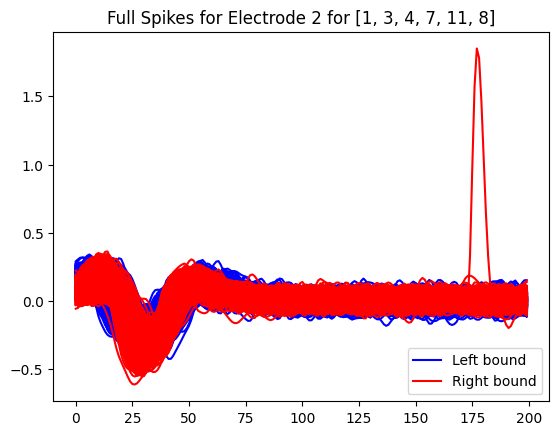

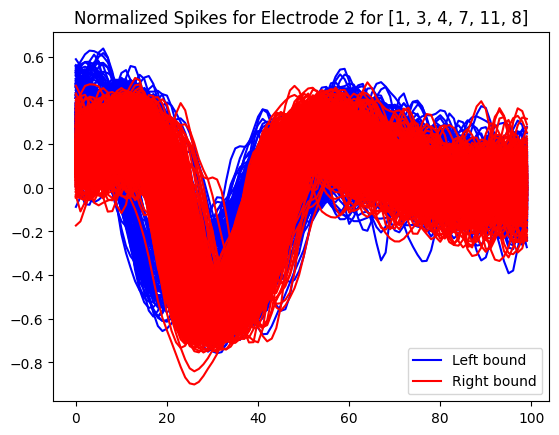

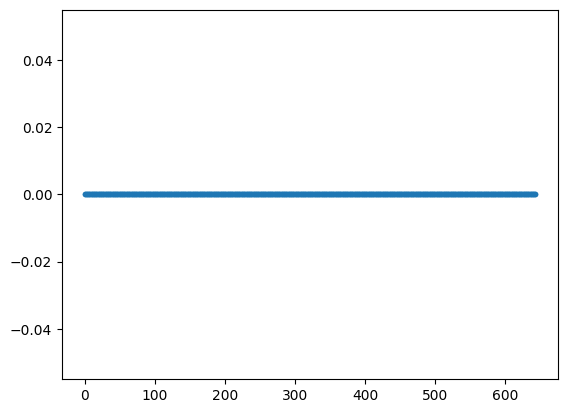

In [65]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
# import tkinter
import my_utilities as mu
from spike_manipulator import Spikes

# Controls
ei          = 2                     # electrode index
norm_spks   = 0                     # normalize spikes? 0='no', 1='yes'
fnums       = [1, 3, 4, 7, 11, 8]         # file number to load
# fnums       = [1, 3]              # file number to load
norm_len    = 199                   # normalized spike lengths
stim_mode   = "all"                 # stimulus edge used to keep neural signals = "rise", "fall", or "all"
save_dat    = 1

# Constants
dat_dir     = 'Data/Raw/'           # directory where .mat neural data files are located
sig_colors  = ['g', 'b', 'y', 'r', 'm']

# main
num_files = len(fnums)
X_good = []
X = []
y = []

for fnum in fnums:
    raw, fname = mu.load_raw(dat_dir, fnum, 0)
    spks = Spikes(raw, stim_mode, 0)
    spks_good = spks.to_good_spikes(ei)
    if norm_spks:
        spks_norm = spks.normalize(spks_good, norm_len)
    else:
        spks_norm = spks.normalize_amplitude_only(spks_good[:100,:])        
        #spks_norm = spks_good[:100,:]
    spks_len = spks.spks_len
    n_spks = spks.num_good_spks

    ones_arr = np.ones(n_spks).astype('int')
    labels = mu.get_label(fname) * ones_arr

    if fnum == fnums[0]:
        X_good = np.array(spks_good)
        X = np.array(spks_norm)
        y = labels
    else:
        X_good = np.append(X_good, spks_good, axis=1)
        X = np.append(X, spks_norm, axis=1)
        y = np.append(y, labels)
    
    print(f'{fname} has {n_spks} good spikes with length of {spks_len}')

print(X.shape)
print(y.shape)

# plotting
lb_indexes = y==0
rb_indexes = y==1

# plot spikes (not normalized)
plt.figure()
plt.plot(X_good[:, lb_indexes][:, 0], 'b', label='Left bound')
plt.plot(X_good[:, rb_indexes][:, 0], 'r', label='Right bound')

plt.plot(X_good[:, lb_indexes][:, 1:], 'b')
plt.plot(X_good[:, rb_indexes][:, 1:], 'r')

plt.legend(loc='lower right')
plt.title(f'Full Spikes for Electrode {ei} for {fnums}')

# plot normalized spikes
plt.figure()
plt.plot(X[:, lb_indexes][:, 0], 'b', label='Left bound')
plt.plot(X[:, rb_indexes][:, 0], 'r', label='Right bound')

plt.plot(X[:, lb_indexes][:, 1:], 'b')
plt.plot(X[:, rb_indexes][:, 1:], 'r')

plt.legend(loc='lower right')
plt.title(f'Normalized Spikes for Electrode {ei} for {fnums}')


plt.figure()
plt.plot(y[lb_indexes], '.')

# # plotting
# plt.figure()
# plt.plot(X, 'k')
# plt.title(f'Electrode {ei} for {fnums}')
# plt.figure()
# plt.plot(y, '.')

if save_dat:
    X = X.T
    np.save('X.npy', X)
    np.save('y.npy', y)    



In [66]:
print(X.shape)
print(y.shape)
print(X)
print(y)


(1430, 100)
(1430,)
[[ 0.42847465  0.35631837  0.27805143 ...  0.13925465  0.11337461
   0.07684982]
 [ 0.49414792  0.4834975   0.46079199 ... -0.04837933 -0.06276392
  -0.06552959]
 [ 0.46007847  0.46055903  0.48279534 ... -0.10934311 -0.06210173
  -0.02940004]
 ...
 [ 0.19014038  0.18211237  0.20718417 ...  0.25365273  0.25905907
   0.24905108]
 [ 0.21544727  0.25432377  0.30790013 ...  0.03967804  0.03988563
   0.02279056]
 [ 0.36134929  0.28638674  0.22478728 ...  0.06829528  0.06881756
   0.06258818]]
[0 0 0 ... 0 0 0]


In [67]:
[[], X.shape[0], X.shape[1]]

[[], 1430, 100]

In [68]:
X[0]

array([ 0.42847465,  0.35631837,  0.27805143,  0.21959349,  0.19185157,
        0.17666255,  0.13551837,  0.059729  , -0.02572728, -0.10129789,
       -0.15301839, -0.17714372, -0.20110203, -0.2451732 , -0.2893223 ,
       -0.32776037, -0.38159876, -0.44209141, -0.49932291, -0.55015977,
       -0.57152535, -0.55400555, -0.52353381, -0.50333674, -0.48689746,
       -0.46680982, -0.44653469, -0.42585312, -0.39105474, -0.33958891,
       -0.27902478, -0.22139869, -0.17591444, -0.1296733 , -0.0676088 ,
        0.00827565,  0.07204221,  0.10155856,  0.10150859,  0.10053062,
        0.11616581,  0.14692388,  0.1789576 ,  0.18291795,  0.1516579 ,
        0.10831905,  0.07393984,  0.0608805 ,  0.07894425,  0.10779541,
        0.12665415,  0.13952044,  0.15155061,  0.15239703,  0.13859299,
        0.13119114,  0.13601163,  0.13148761,  0.10306594,  0.06836734,
        0.04511599,  0.03059659,  0.00227426, -0.04183882, -0.07340001,
       -0.08210701, -0.08321612, -0.09765818, -0.11680094, -0.12